layer## This iterations will observe

While batch size, number of epochs and learning rates are kept constant

1.   Improvement in the architecture by varying Drop out values 
2.   Experiment with the Batch Normalization layer placement
3.  Experiment with receptive field 




In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Convolution2D, Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


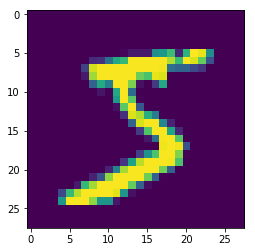

In [142]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [145]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [147]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1))) #26x26x16, RF 3x3
model.add(BatchNormalization())


model.add(Conv2D(16, (3,3), activation='relu')) # 24x24x16 , RF 5x5
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu')) # 22x22x32 , RF 7x7
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x32 , RF 14x14
model.add(Conv2D(8, (1, 1), activation='relu')) # 11x11x8
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), activation='relu')) # 9x9x16 , RF 16x16
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu')) # 7x7x32 , RF 18x18
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(10, 1, activation='relu')) # 7x7x10

model.add(Conv2D(10, (3,3), activation='relu')) # 5x5x10 , RF 20x20
model.add(BatchNormalization())
model.add(Conv2D(10, (3,3), activation='relu')) # 3x3x10 , RF 22x22
model.add(BatchNormalization())

model.add(Conv2D(10, 3)) # 1x1x10
# model.add(Conv2D(10, 7))
model.add(Flatten()) # 1x10
model.add(Activation('softmax'))
 

In [149]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_55 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_56 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_57 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [151]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.2936 - acc: 0.9086 - val_loss: 0.0599 - val_acc: 0.9812
Epoch 2/10
60000/60000 [==============================] - 24s 406us/step - loss: 0.0797 - acc: 0.9752 - val_loss: 0.0479 - val_acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.0641 - acc: 0.9795 - val_loss: 0.0384 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0559 - acc: 0.9832 - val_loss: 0.0485 - val_acc: 0.9841
Epoch 5/10
60000/60000 [==============================] - 24s 402us/step - loss: 0.0501 - acc: 0.9841 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0326 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0416 - acc: 0.9868 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [153]:
print(score)

[0.027102882160199807, 0.9907]


In [0]:
y_pred = model.predict(X_test)

In [155]:
print(y_pred[:9])
print(y_test[:9])

[[7.03262160e-09 8.74066984e-07 6.47255433e-07 1.61420303e-06
  5.22629300e-08 6.84697588e-09 5.07690501e-10 9.99991179e-01
  5.58737163e-08 5.61528350e-06]
 [3.16830574e-06 6.20814171e-06 9.99987483e-01 3.66906505e-08
  4.33686921e-07 6.61090849e-10 2.37595373e-06 2.32291328e-07
  2.31442989e-08 2.87448043e-09]
 [6.75046465e-07 9.99880195e-01 4.66739209e-07 3.04936725e-06
  3.51138915e-05 2.66346342e-05 4.39159812e-05 4.35937773e-06
  2.09790915e-06 3.51368840e-06]
 [9.99917030e-01 1.35708378e-09 7.08687230e-06 2.00817013e-07
  6.60719621e-08 2.76717458e-08 3.45121038e-07 6.64646507e-07
  2.11671813e-05 5.34768988e-05]
 [9.21032672e-09 9.97657637e-08 7.61754382e-10 4.73364958e-10
  9.99983549e-01 4.95340258e-09 6.23175254e-07 4.15214840e-09
  2.62189581e-09 1.57743198e-05]
 [7.93912989e-07 9.99955535e-01 3.61820275e-06 2.30941282e-06
  1.18341495e-05 1.59165484e-06 1.54830850e-05 4.78472202e-06
  2.00646446e-06 1.95628127e-06]
 [1.72243002e-08 2.81438734e-05 9.46260798e-07 1.49689242e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

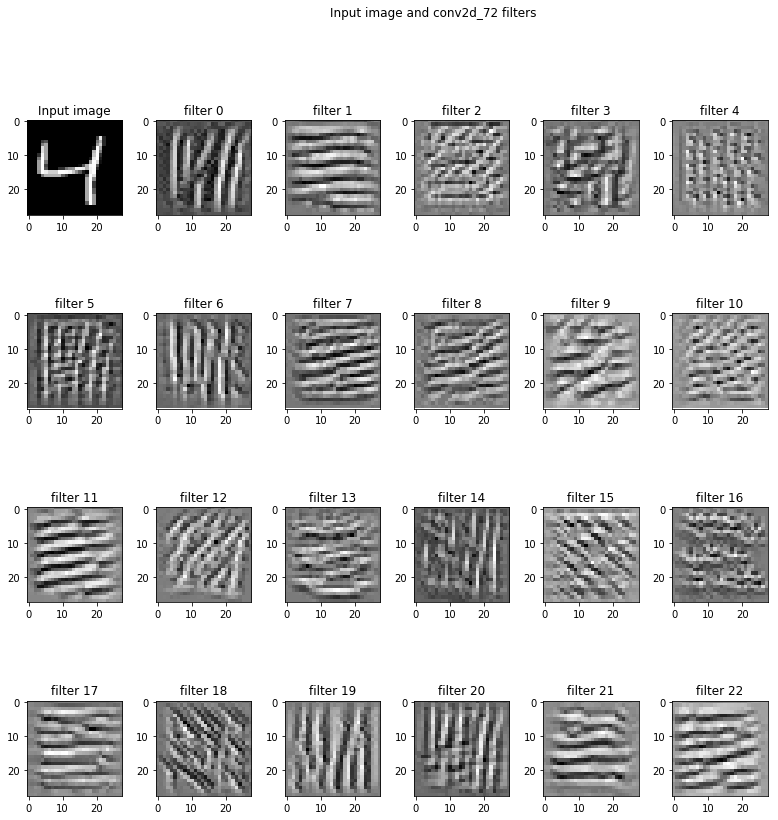

In [159]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_72'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()


## Observation

#### With receptive field of 24x24
Validation Accuracy:99.07%
Parameters: 15.5k


#### With receptive field of 20x20
Validation Accuracy:99.14%
Parameters: 17.6k


1.   Experiment on receptive field was conducted with the last network. Although number of parameters reduced, there was no significant improvement observed in the validation accuracy on increasing the receptive field from 20x20 to 24x24.
 
2. Adding more dropout layers increased the train accurac and reduced overfitting 



## Scope for improvement




1.   Improve accuracy with reduced parameters






